In [1]:
using LinearAlgebra
using Distributions
using DelimitedFiles
using BAT
using DataStructures
using CairoMakie
using DataFrames

In [2]:
flux_chunks = []
for i in 19:-1:0
    idx = i*103 + 3: (i+1)*103
    push!(flux_chunks, Float32.(readdlm("spl-nu-20-01-000.d")[idx, 2:5]))
end

In [3]:
log10_energy_values = LinRange(-1, 4, 101)

101-element LinRange{Float64, Int64}:
 -1.0, -0.95, -0.9, -0.85, -0.8, -0.75, …, 3.75, 3.8, 3.85, 3.9, 3.95, 4.0

In [4]:
cz_flux_bins = LinRange(-1, 1, 21);
energy_flux_values = 10 .^ log10_energy_values;

In [5]:
cz_flux_values = LinRange(-0.95, 0.95, 20);

In [6]:
hkkm_flux = permutedims(stack(flux_chunks), [1, 3, 2]);

In [7]:
using Interpolations

In [8]:
flux = OrderedDict()

OrderedDict{Any, Any}()

In [9]:
flux[:numu] = cubic_spline_interpolation((log10_energy_values, cz_flux_values), hkkm_flux[:, :, 1], extrapolation_bc = Line());
flux[:numubar] = cubic_spline_interpolation((log10_energy_values, cz_flux_values), hkkm_flux[:, :, 2], extrapolation_bc = Line());
flux[:nue] = cubic_spline_interpolation((log10_energy_values, cz_flux_values), hkkm_flux[:, :, 3], extrapolation_bc = Line());
flux[:nuebar] = cubic_spline_interpolation((log10_energy_values, cz_flux_values), hkkm_flux[:, :, 4], extrapolation_bc = Line());

In [10]:
cz = -1:0.01:1
log10e = -1:0.01:4

-1.0:0.01:4.0

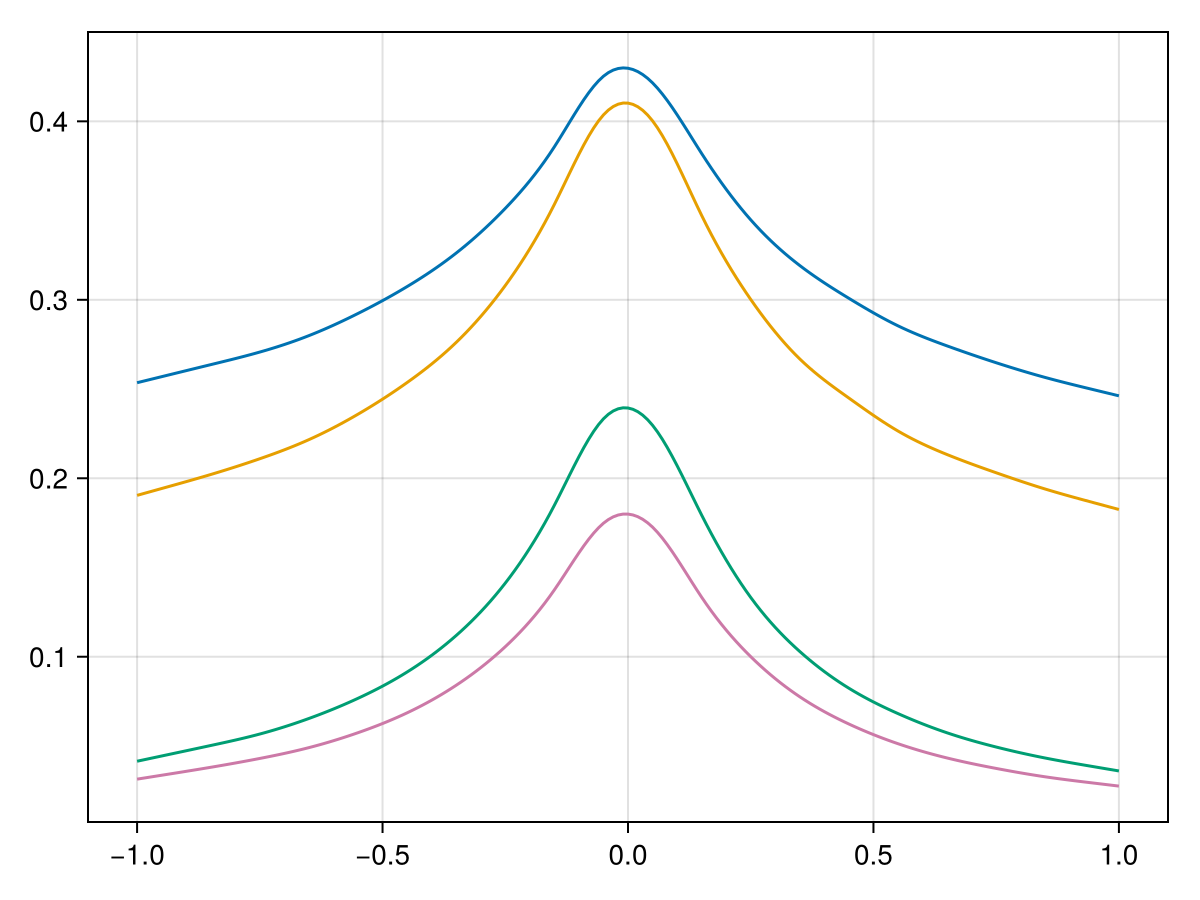

In [11]:
fig = Figure()
ax = Axis(fig[1, 1])
e = 1
lines!(ax, cz, flux[:numu].(e, cz))
lines!(ax, cz, flux[:numubar].(e, cz))
lines!(ax, cz, flux[:nue].(e, cz))
lines!(ax, cz, flux[:nuebar].(e, cz))
fig

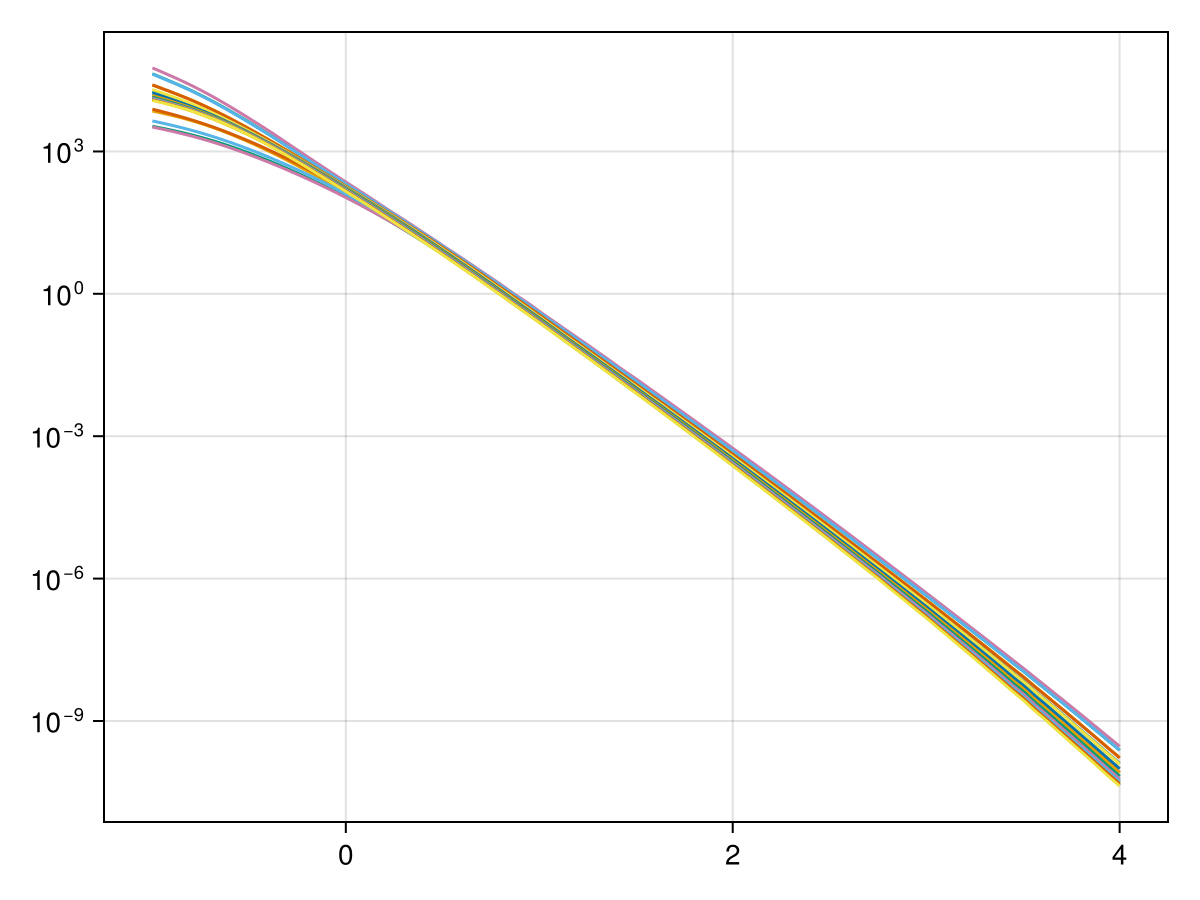

In [12]:
fig = Figure()
ax = Axis(fig[1, 1]; yscale=log10)
for cz in -1:0.1:1
    lines!(ax, log10e, flux[:numu].(log10e, cz))
end
fig

In [13]:
using CSV

In [14]:
mc_nu = CSV.read(joinpath("neutrino_mc.csv"), DataFrame; header=true);

In [15]:
hist_mu = CSV.read(joinpath("muons.csv"), DataFrame; header=true);

In [16]:
hist_data = CSV.read(joinpath("data.csv"), DataFrame; header=true);

In [17]:
hyperplanes_all_nc = CSV.read(joinpath("hyperplanes_all_nc.csv"), DataFrame; header=true);
hyperplanes_nue_cc = CSV.read(joinpath("hyperplanes_nue_cc.csv"), DataFrame; header=true);
hyperplanes_numu_cc = CSV.read(joinpath("hyperplanes_numu_cc.csv"), DataFrame; header=true);
hyperplanes_nutau_cc = CSV.read(joinpath("hyperplanes_nutau_cc.csv"), DataFrame; header=true);

In [18]:
reco_energy_bin_edges = [5.623413,  7.498942, 10. , 13.335215, 17.782795, 23.713737, 31.622776, 42.16965 , 56.23413]
reco_coszen_bin_edges = [-1., -0.75, -0.5 , -0.25,  0., 0.25, 0.5, 0.75, 1.]
pid_bin_edges = -0.5:1:1.5
type_bin_edges = [-0.5, 0.5, 3.5]

3-element Vector{Float64}:
 -0.5
  0.5
  3.5

In [19]:
using StatsBase

In [20]:
muon_histo = fit(Histogram, (hist_mu.reco_energy, hist_mu.reco_coszen, hist_mu.pid), weights(hist_mu.count), (reco_energy_bin_edges, reco_coszen_bin_edges, pid_bin_edges)).weights
muon_histo_abs_uncert = fit(Histogram, (hist_mu.reco_energy, hist_mu.reco_coszen, hist_mu.pid), weights(hist_mu.abs_uncert), (reco_energy_bin_edges, reco_coszen_bin_edges, pid_bin_edges)).weights

8×8×2 Array{Float64, 3}:
[:, :, 1] =
 1.21708  2.72346  1.67064  3.04865  1.64254   2.94666  1.52093   1.48547
 2.49286  3.4142   4.53764  5.06559  2.40605   1.88694  2.22315   4.62524
 2.72346  2.13757  2.78584  2.00024  2.82236   6.04332  2.45043   6.18337
 5.09299  1.91197  2.47738  5.74346  9.53021   3.26136  8.53483   6.93141
 4.47374  3.14321  3.33892  4.57634  3.34256  11.7321   4.85843   6.24861
 2.13436  4.74325  2.46363  2.89639  3.34857   7.89187  4.20804  10.8736
 1.25832  2.20784  2.23023  3.93309  4.72431   5.55795  5.53983   5.40263
 1.22022  2.07122  2.07122  2.44149  2.09977   2.83537  7.46986   3.55884

[:, :, 2] =
 0.909267  4.04704  1.04568  2.63509  3.15086   2.72998   3.32528   1.55485
 2.15024   1.44931  2.09556  4.26177  1.52098   1.55531   1.57297   3.28613
 3.32528   1.20408  1.81636  4.46443  2.23023   4.12376   5.26414   5.53243
 2.40461   1.98345  1.32518  1.89429  2.62557   3.85729   3.83736   3.84252
 1.16125   2.54806  3.25865  2.31462  2.61925   5.54387

In [21]:
data_histo = Int.(fit(Histogram, (hist_data.reco_energy, hist_data.reco_coszen, hist_data.pid), weights(hist_data.count), (reco_energy_bin_edges, reco_coszen_bin_edges, pid_bin_edges)).weights)

8×8×2 Array{Int64, 3}:
[:, :, 1] =
 254  418  447  429  360  217  100   31
 338  480  623  600  531  380  210   93
 406  533  736  773  679  609  408  229
 395  550  668  778  728  669  533  366
 350  460  573  679  733  675  530  418
 239  302  430  498  560  538  429  307
 136  216  297  390  409  348  268  205
  98  150  197  239  252  215  177  112

[:, :, 2] =
 196  210  242  224  177   97   67   43
 176  171  247  206  197  136  103   66
 216  194  253  281  269  204  167  118
 177  208  262  336  374  299  202  175
 182  212  326  464  421  392  265  216
 133  217  342  496  454  360  267  177
 121  224  295  389  427  315  224  109
 129  192  242  313  281  226  139   58

In [22]:
mc_nu.e_idx = searchsortedfirst.(Ref(reco_energy_bin_edges), mc_nu.reco_energy) .- 1
mc_nu.c_idx = searchsortedfirst.(Ref(reco_coszen_bin_edges), mc_nu.reco_coszen) .- 1
mc_nu.p_idx = searchsortedfirst.(Ref(pid_bin_edges), mc_nu.pid) .- 1
mc_nu.t_idx = searchsortedfirst.(Ref(type_bin_edges), mc_nu.type) .- 1

795502-element Vector{Int64}:
 2
 2
 2
 2
 2
 2
 2
 2
 2
 2
 2
 2
 2
 ⋮
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1

In [23]:
mc_nu

795502×12 DataFrame
    Row │ pdg    pid    reco_coszen  reco_energy  true_coszen  true_energy  ty ⋯
        │ Int64  Int64  Float64      Float64      Float64      Float64      In ⋯
────────┼───────────────────────────────────────────────────────────────────────
      1 │    12      1        0.125          6.6   -0.166886       3.12526     ⋯
      2 │    12      0       -0.625          6.6    0.0840211      3.59735
      3 │    12      0       -0.375          8.7   -0.0245363      3.4476
      4 │    12      0       -0.125         11.7   -0.684406       2.93245
      5 │    12      0       -0.625          8.7    0.0346757      2.99903     ⋯
      6 │    12      0       -0.125          6.6   -0.230042       2.67212
      7 │    12      0        0.875          8.7    0.640466       3.66991
      8 │    12      1        0.125          6.6   -0.471117       3.7195
      9 │    12      0        0.125          8.7   -0.257905       2.91426     ⋯
     10 │    12      0       -0.625          8.7   -0.536571       2.7757
     11 │    12      1        0.625          6.6    0.176748       1.74886
   ⋮    │   ⋮      ⋮         ⋮            ⋮            ⋮            ⋮          ⋱
 795493 │   -16      1       -0.375          6.6   -0.119752      30.7688
 795494 │   -16      1       -0.875         36.9   -0.720309     154.344       ⋯
 795495 │   -16      0        0.875         49.2   -0.278763      37.2774
 795496 │   -16      0       -0.375          8.7   -0.609782      31.3207
 795497 │   -16      0        0.625         49.2    0.42704       33.1306
 795498 │   -16      1       -0.125          6.6   -0.162431      30.7184      ⋯
 795499 │   -16      0        0.375         36.9    0.448504      57.9954
 795500 │   -16      0       -0.625         20.7   -0.734529      55.731
 795501 │   -16      0       -0.375         20.7   -0.828791      40.8545
 795502 │   -16      0       -0.125         20.7    0.102555      50.9148      ⋯
                                               6 columns and 795481 rows omitted

In [24]:
using Newtrinos

In [25]:
L1 = 19.
R = 6378.2 + L1
function cz_to_L(cz)
    zen = acos.(cz)
    phi = asin.((1-L1/R) * sin.(zen))
    psi = zen .- phi
    sqrt.((R-L1)^2 + R^2 .- (2*(R-L1) * R * cos.(psi)))
end

cz_to_L (generic function with 1 method)

In [26]:
using BenchmarkTools

In [27]:
cz_fine_bins = LinRange(-1,1, 201)
log10e_fine_bins = LinRange(0,3,201)

201-element LinRange{Float64, Int64}:
 0.0, 0.015, 0.03, 0.045, 0.06, 0.075, 0.09, …, 2.94, 2.955, 2.97, 2.985, 3.0

In [28]:
cz_fine_bins = vcat(LinRange(-1,0.2, 121), LinRange(0.2,1, 9)[2:end])
log10e_fine_bins = vcat(LinRange(0,2,101), [3])

102-element Vector{Float64}:
 0.0
 0.02
 0.04
 0.06
 0.08
 0.1
 0.12
 0.14
 0.16
 0.18
 0.2
 0.22
 0.24
 ⋮
 1.8
 1.82
 1.84
 1.86
 1.88
 1.9
 1.92
 1.94
 1.96
 1.98
 2.0
 3.0

In [29]:
e_fine_bins = 10 .^log10e_fine_bins

102-element Vector{Float64}:
    1.0
    1.0471285480508996
    1.096478196143185
    1.1481536214968828
    1.202264434617413
    1.2589254117941673
    1.318256738556407
    1.3803842646028848
    1.4454397707459274
    1.5135612484362082
    1.5848931924611136
    1.6595869074375607
    1.7378008287493754
    ⋮
   63.09573444801933
   66.06934480075961
   69.18309709189366
   72.44359600749902
   75.85775750291836
   79.43282347242814
   83.17637711026708
   87.09635899560806
   91.20108393559097
   95.4992586021436
  100.0
 1000.0

In [30]:
l_fine_bins = cz_to_L(cz_fine_bins);

In [31]:
e_fine = 0.5 .* (e_fine_bins[1:end-1] .+ e_fine_bins[2:end]);
l_fine = 0.5 .* (l_fine_bins[1:end-1] .+ l_fine_bins[2:end]);

In [32]:
params_dict = OrderedDict()
params_dict[:deepcore_lifetime] = 2.5
params_dict[:deepcore_atm_muon_scale] = 1.0

1.0

In [33]:
mc_nu.log10_true_energy = log10.(mc_nu.true_energy)
mc_nu.l = cz_to_L(mc_nu.true_coszen);

In [34]:
mc_nu.ef_idx = searchsortedfirst.(Ref(log10e_fine_bins), mc_nu.log10_true_energy) .- 1
mc_nu.cf_idx = searchsortedfirst.(Ref(cz_fine_bins), mc_nu.true_coszen) .- 1

795502-element Vector{Int64}:
  84
 109
  98
  32
 104
  77
 125
  53
  75
  47
 118
 106
 121
   ⋮
  95
  77
  89
  28
  73
  40
 123
  84
 123
  27
  18
 111

In [35]:
mc = OrderedDict()

OrderedDict{Any, Any}()

In [36]:
mc[:nue] = mc_nu[mc_nu.pdg .== 12, :]
mc[:nuebar] = mc_nu[mc_nu.pdg .== -12, :]
mc[:numu] = mc_nu[mc_nu.pdg .== 14, :]
mc[:numubar] = mc_nu[mc_nu.pdg .== -14, :]
mc[:nutau] = mc_nu[mc_nu.pdg .== 16, :]
mc[:nutaubar] = mc_nu[mc_nu.pdg .== -16, :]

21094×16 DataFrame
   Row │ pdg    pid    reco_coszen  reco_energy  true_coszen  true_energy  typ ⋯
       │ Int64  Int64  Float64      Float64      Float64      Float64      Int ⋯
───────┼────────────────────────────────────────────────────────────────────────
     1 │   -16      0        0.625          8.7    0.850807       8.84088      ⋯
     2 │   -16      0        0.375         11.7    0.539387       7.90468
     3 │   -16      0       -0.625          8.7   -0.112069       9.71287
     4 │   -16      0       -0.625         15.6   -0.303866       8.74344
     5 │   -16      0        0.125          6.6    0.550843       8.35092      ⋯
     6 │   -16      1       -0.625          8.7   -0.995494       9.3353
     7 │   -16      0       -0.625          6.6   -0.761305       6.21679
     8 │   -16      0       -0.375          6.6   -0.143835       9.11394
     9 │   -16      0       -0.375          8.7   -0.729606       6.09981      ⋯
    10 │   -16      0       -0.875         15.6   -0.287952       8.81884
    11 │   -16      0        0.375         11.7    0.438583       7.89073
   ⋮   │   ⋮      ⋮         ⋮            ⋮            ⋮            ⋮         ⋮ ⋱
 21085 │   -16      1       -0.375          6.6   -0.119752      30.7688
 21086 │   -16      1       -0.875         36.9   -0.720309     154.344        ⋯
 21087 │   -16      0        0.875         49.2   -0.278763      37.2774
 21088 │   -16      0       -0.375          8.7   -0.609782      31.3207
 21089 │   -16      0        0.625         49.2    0.42704       33.1306
 21090 │   -16      1       -0.125          6.6   -0.162431      30.7184       ⋯
 21091 │   -16      0        0.375         36.9    0.448504      57.9954
 21092 │   -16      0       -0.625         20.7   -0.734529      55.731
 21093 │   -16      0       -0.375         20.7   -0.828791      40.8545
 21094 │   -16      0       -0.125         20.7    0.102555      50.9148       ⋯
                                               10 columns and 21073 rows omitted

In [37]:
flavs = [:nue, :numu, :nutau]

3-element Vector{Symbol}:
 :nue
 :numu
 :nutau

In [38]:
for anti in ["", "bar"]
    for flav in flavs
        flav = Symbol(flav, anti)
        for key in [:nue, :numu]
            fkey = Symbol(key, anti)
            mc[flav][!, "flux_" * String(key)] = flux[fkey].(mc[flav].log10_true_energy, mc[flav].true_coszen);
        end
    end
end

## ...data is now prepared...

In [39]:
# function reweight(mc, params, osc_prob)

#     p_nu = osc_prob(e_fine, l_fine, params);
#     p_nubar = osc_prob(e_fine, l_fine, params, anti=true);


#     osc_flux = OrderedDict()
    
#     for i in 1:3
#         flav = flavs[i]
#         p_nue_interp = linear_interpolation((log10e_fine, cz_fine), p_nu[:,:,1,i], extrapolation_bc = Flat());
#         p_numu_interp = linear_interpolation((log10e_fine, cz_fine), p_nu[:,:,2,i], extrapolation_bc = Flat());
    
#         p_nue = p_nue_interp.(mc[flav].log10_true_energy, mc[flav].true_coszen)
#         p_numu = p_numu_interp.(mc[flav].log10_true_energy, mc[flav].true_coszen)
    
#         osc_flux[flav] = p_nue .* mc[flav].flux_nue .+ p_numu .* mc[flav].flux_numu
#     end
    
#     for i in 1:3
#         flav = Symbol(flavs[i], "bar")
#         p_nue_interp = linear_interpolation((log10e_fine, cz_fine), p_nubar[:,:,1,i], extrapolation_bc = Flat());
#         p_numu_interp = linear_interpolation((log10e_fine, cz_fine), p_nubar[:,:,2,i], extrapolation_bc = Flat());
    
#         p_nue = p_nue_interp.(mc[flav].log10_true_energy, mc[flav].true_coszen)
#         p_numu = p_numu_interp.(mc[flav].log10_true_energy, mc[flav].true_coszen)
    
#         osc_flux[flav] = p_nue .* mc[flav].flux_nuebar .+ p_numu .* mc[flav].flux_numubar
#     end

#     osc_flux
# end

# ToDo
- add flux systematics
- split by CC / NC
- add hyperplanes

In [80]:
function make_hist(e_idx, c_idx, p_idx, t_idx, w, size=(8,8,2,2))
    hist = similar(w, size)
    for i in 1:prod(size)
        hist[i] = 0.
    end
    for i in 1:length(w)
        hist[e_idx[i], c_idx[i], p_idx[i], t_idx[i]] += w[i]
    end
    #copy(hist)
    hist
end

make_hist (generic function with 2 methods)

In [41]:
using ForwardDiff

In [42]:
p = NamedTuple(merge(Newtrinos.osc.standard.params, params_dict))

(θ₁₂ = 0.5872523687443223, θ₁₃ = 0.1454258194533693, θ₂₃ = 0.8556288707523761, δCP = 1.0, Δm²₂₁ = 7.53e-5, Δm²₃₁ = 0.0024752999999999997, deepcore_lifetime = 2.5, deepcore_atm_muon_scale = 1.0)

In [43]:
osc_prob = Newtrinos.osc.standard.osc_prob

osc_prob (generic function with 1 method)

In [44]:
function reweight_per_channel(p, mc, out)
    pmce = [p[ef_idx, cf_idx, 1, out] for (ef_idx, cf_idx) in zip(mc.ef_idx, mc.cf_idx)]
    pmcmu = [p[ef_idx, cf_idx, 2, out] for (ef_idx, cf_idx) in zip(mc.ef_idx, mc.cf_idx)]
    return pmce .* mc.flux_nue .+ pmcmu .* mc.flux_numu   
    # this is super slow:
    #map((i, j, fe, fm) -> dot([fe, fm, 0], p[i, j, :, out]), mc.ef_idx, mc.cf_idx, mc.flux_nue, mc.flux_numu)
end

reweight_per_channel (generic function with 1 method)

In [45]:
channels = collect(keys(mc))

6-element Vector{Any}:
 :nue
 :nuebar
 :numu
 :numubar
 :nutau
 :nutaubar

In [46]:
function reweight(mc, params, osc_prob)
    p = [osc_prob(e_fine, l_fine, params), osc_prob(e_fine, l_fine, params, anti=true)]
    [reweight_per_channel(p[(i+1)%2+1], mc[channels[i]], Int(ceil(i/2))) for i in 1:length(channels)]
end

reweight (generic function with 1 method)

In [47]:
function make_hist_per_channel(mc, osc_flux, lifetime_seconds)
    w = lifetime_seconds * mc.weight .* osc_flux
    make_hist(mc.e_idx, mc.c_idx, mc.p_idx, mc.t_idx, w)
end

make_hist_per_channel (generic function with 1 method)

In [48]:
function get_expected(params, osc_prob)

    osc_flux = reweight(mc, params, osc_prob)

    lifetime_seconds = params.deepcore_lifetime * 365 * 24 * 3600

    hists = [make_hist_per_channel(mc[ch], osc_flux[i], lifetime_seconds) for (i,ch) in enumerate(channels)]
    
    expected_nu = sum([sum(h, dims=4) for h in hists])

    expected = expected_nu[:, :, :, 1] .+ params.deepcore_atm_muon_scale .* muon_histo
end

get_expected (generic function with 1 method)

In [49]:
function forward_model(osc_prob)
    model = params -> begin
        exp_events = get_expected(params, osc_prob)
        distprod(Poisson.(exp_events))
    end
end

forward_model (generic function with 1 method)

In [50]:
f = forward_model(Newtrinos.osc.standard.osc_prob)

#11 (generic function with 1 method)

In [51]:
@time logpdf(f(p), data_histo)

  1.767241 seconds (3.80 M allocations: 226.695 MiB, 6.19% gc time, 92.67% compilation time)


-587.0359166379943

In [52]:
using ADTypes

In [114]:
adsel = AutoForwardDiff()
context = set_batcontext(ad = adsel)

BATContext{Float64}(Random123.Philox4x{UInt64, 10}(0x11297c69893e3797, 0xef72533c615c07d3, 0x768813ba0225add7, 0xe5204fe70e64704a, 0xff8d08ce838eda1d, 0x949057e62a6c7113, 0x0000000000000003, 0x0000000000000000, 0x0000000000000000, 0x0000000000000000, 4), HeterogeneousComputing.CPUnit(), AutoForwardDiff())

In [54]:
using DensityInterface

In [55]:
llh = let osc_prob = Newtrinos.osc.standard.osc_prob, observed = data_histo
        params -> logpdf(forward_model(osc_prob)(params), observed)
end

l = logfuncdensity(params -> llh(params))

LogFuncDensity(var"#15#16"())

In [56]:
@benchmark logdensityof(l, p)

BenchmarkTools.Trial: 456 samples with 1 evaluation per sample.
 Range (min … max):   7.485 ms … 28.978 ms  ┊ GC (min … max):  0.00% … 47.83%
 Time  (median):     10.745 ms              ┊ GC (median):    18.56%
 Time  (mean ± σ):   10.916 ms ±  2.602 ms  ┊ GC (mean ± σ):  12.46% ± 10.53%

   ▄█▁  ▄▆▁▁  ▂▂▄ ▂ ▄▅▁▂ ▁                                     
  ████▅▆████▇▆██████████▆█▅▃▅▃▄▄▃▃▁▂▁▂▂▁▁▁▁▁▁▁▁▁▁▁▂▁▁▁▁▁▁▁▃▁▂ ▄
  7.48 ms         Histogram: frequency by time          22 ms <

 Memory estimate: 35.72 MiB, allocs estimate: 302.

In [58]:
NamedTuple{Tuple(keys(p))}(values(p))

(θ₁₂ = 0.5872523687443223, θ₁₃ = 0.1454258194533693, θ₂₃ = 0.8556288707523761, δCP = 1.0, Δm²₂₁ = 7.53e-5, Δm²₃₁ = 0.0024752999999999997, deepcore_lifetime = 2.5, deepcore_atm_muon_scale = 1.0)

In [67]:
pnames = Tuple(keys(p))

(:θ₁₂, :θ₁₃, :θ₂₃, :δCP, :Δm²₂₁, :Δm²₃₁, :deepcore_lifetime, :deepcore_atm_muon_scale)

In [68]:
function wrapped_llh(p_vec)
    p = NamedTuple{pnames}(values(p_vec))
    logdensityof(l, p)
end

wrapped_llh (generic function with 1 method)

In [ ]:
ForwardDiff.gradient(

In [112]:
@benchmark wrapped_llh(values(p))

BenchmarkTools.Trial: 303 samples with 1 evaluation per sample.
 Range (min … max):  12.602 ms … 26.052 ms  ┊ GC (min … max):  0.00% … 17.25%
 Time  (median):     17.162 ms              ┊ GC (median):    18.47%
 Time  (mean ± σ):   16.465 ms ±  2.451 ms  ┊ GC (mean ± σ):  11.24% ±  9.61%

     ▃▅▇▄               ▂▆▇▆█                                  
  ▃▁▄█████▆▄▅▃▄▅▃▄▃▅▃▃▄▇██████▆▄▄▄▄▄▄▄▄▄▃▃▁▃▃▁▁▃▁▃▁▁▁▁▁▁▃▁▁▁▃ ▄
  12.6 ms         Histogram: frequency by time        24.4 ms <

 Memory estimate: 35.71 MiB, allocs estimate: 300.

In [76]:
collect(values(p))

8-element Vector{Float64}:
 0.5872523687443223
 0.1454258194533693
 0.8556288707523761
 1.0
 7.53e-5
 0.0024752999999999997
 2.5
 1.0

In [111]:
@time ForwardDiff.gradient(wrapped_llh, collect(values(p)))

  0.337738 seconds (330 allocations: 321.295 MiB, 67.73% gc time)


8-element Vector{Float64}:
     -0.29032227056403653
   -117.7306814063345
   -202.62735978065436
      0.8212007212448443
  17204.748880419407
 -10633.949709795825
   -227.02849175823476
     -3.30113192341687

In [100]:
priors = OrderedDict()
priors[:deepcore_lifetime] = Uniform(2, 4)
priors[:deepcore_atm_muon_scale ] = Uniform(0, 2)

Uniform{Float64}(a=0.0, b=2.0)

In [101]:
prior = distprod(;merge(Newtrinos.osc.standard.priors, priors)...)

NamedTupleDist((θ₁₂ = Uniform{Float64}(a=0.4205343352839651, b=0.7853981633974483), θ₁₃ = Uniform{Float64}(a=0.1, b=0.2), θ₂₃ = Uniform{Float64}(a=0.5235987755982988, b=1.0471975511965976), δCP = Uniform{Float64}(a=0.0, b=6.283185307179586), Δm²₂₁ = Uniform{Float64}(a=6.5e-5, b=9.0e-5), Δm²₃₁ = Uniform{Float64}(a=0.002, b=0.003), deepcore_lifetime = Uniform{Float64}(a=2.0, b=4.0), deepcore_atm_muon_scale = Uniform{Float64}(a=0.0, b=2.0)))

In [102]:
posterior = PosteriorMeasure(l, prior)

PosteriorMeasure(objectid = 0xb9a89130eaa88252, varshape = NamedTupleShape((:θ₁₂, :θ₁₃, :θ₂₃, :δCP, :Δm²₂₁, :Δm²₃₁, :deepcore_lifetime, :deepcore_atm_muon_scale)}(…))

In [103]:
using Optim

In [106]:
45/212

0.21226415094339623

In [105]:
@time res = bat_findmode(posterior, OptimAlg(optalg=Optim.LBFGS()))

 45.495332 seconds (138.55 k allocations: 73.911 GiB, 33.43% gc time)


@NamedTuple{result::NamedTuple, result_trafo::Vector, trafo::Function, info, optargs::@NamedTuple{algorithm::OptimAlg{LBFGS{Nothing, LineSearches.InitialStatic{Float64}, LineSearches.HagerZhang{Float64, Base.RefValue{Bool}}, Optim.var"#19#21"}, PriorToGaussian, InitFromTarget}, context::BATContext{Float64, Random123.Philox4x{UInt64, 10}, HeterogeneousComputing.CPUnit, AutoForwardDiff{nothing, Nothing}}}}(((θ₁₂ = 0.7853981633974483, θ₁₃ = 0.1, θ₂₃ = 0.7865166464307466, δCP = 1.4932278224213629, Δm²₂₁ = 9.0e-5, Δm²₃₁ = 0.0023655338947163435, deepcore_lifetime = 2.4631661171965207, deepcore_atm_muon_scale = 1.1221756492578607), [11.768966073380641, -231.67994781043097, 0.005354547649489219, -0.7138673988194425, 8.253376536205856, -0.3437054801562777, -0.7336433762216344, 0.15372781693747878], DistributionTransform(BAT.StandardMvNormal{Float64}(_dim=8), NamedTupleDist{(:θ₁₂, :θ₁₃, :θ₂₃, :δCP, :Δm²₂₁, :Δm²₃₁, :deepcore_lifetime, :deepcore_atm_muon_scale)}(…)), Results of Optimization Algori

In [134]:
res.result

(θ₁₂ = 0.7834989666839361, θ₁₃ = 0.1, θ₂₃ = 0.7865164369616602, δCP = 1.4923329614676066, Δm²₂₁ = 9.0e-5, Δm²₃₁ = 0.0023657028937343703, deepcore_lifetime = 2.463165739414788, deepcore_atm_muon_scale = 1.1221758752887956)

In [97]:
BAT.bat_findmode(posterior)

LoadError: UndefVarError: `posterior` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [135]:
samples = bat_sample(posterior, MCMCSampling(mcalg = MetropolisHastings(), nsteps = 10^4, nchains = 4)).result

[ Info: MCMCChainPoolInit: trying to generate 4 viable MCMC chain(s).
[ Info: Selected 4 MCMC chain(s).
[ Info: Begin tuning of 4 MCMC chain(s).
[ Info: MCMC Tuning cycle 1 finished, 4 chains, 0 tuned, 0 converged.
[ Info: MCMC Tuning cycle 2 finished, 4 chains, 1 tuned, 0 converged.
[ Info: MCMC Tuning cycle 3 finished, 4 chains, 2 tuned, 0 converged.
[ Info: MCMC Tuning cycle 4 finished, 4 chains, 2 tuned, 0 converged.
[ Info: MCMC Tuning cycle 5 finished, 4 chains, 3 tuned, 0 converged.
[ Info: MCMC Tuning cycle 6 finished, 4 chains, 3 tuned, 0 converged.
[ Info: MCMC Tuning cycle 7 finished, 4 chains, 4 tuned, 4 converged.
[ Info: MCMC tuning of 4 chains successful after 7 cycle(s).
[ Info: Running post-tuning stabilization steps for 4 MCMC chain(s).


DensitySampleVector, StructArray with 5 columns and 11016 rows:
      v                       logd      weight  info                    aux
    ┌──────────────────────────────────────────────────────────────────────────
 1  │ (θ₁₂ = 0.537836, θ₁₃ …  -556.425  5       MCMCSampleID(2, 10, 0…  nothing
 2  │ (θ₁₂ = 0.58647, θ₁₃ =…  -557.039  2       MCMCSampleID(2, 10, 5…  nothing
 3  │ (θ₁₂ = 0.635336, θ₁₃ …  -556.716  3       MCMCSampleID(2, 10, 7…  nothing
 4  │ (θ₁₂ = 0.667471, θ₁₃ …  -556.992  4       MCMCSampleID(2, 10, 1…  nothing
 5  │ (θ₁₂ = 0.746328, θ₁₃ …  -556.689  2       MCMCSampleID(2, 10, 1…  nothing
 6  │ (θ₁₂ = 0.720796, θ₁₃ …  -556.908  1       MCMCSampleID(2, 10, 1…  nothing
 7  │ (θ₁₂ = 0.562242, θ₁₃ …  -556.714  27      MCMCSampleID(2, 10, 1…  nothing
 8  │ (θ₁₂ = 0.50616, θ₁₃ =…  -557.38   1       MCMCSampleID(2, 10, 4…  nothing
 9  │ (θ₁₂ = 0.485252, θ₁₃ …  -557.367  2       MCMCSampleID(2, 10, 4…  nothing
 10 │ (θ₁₂ = 0.482875, θ₁₃ …  -558.237  2       MCMCSampleID

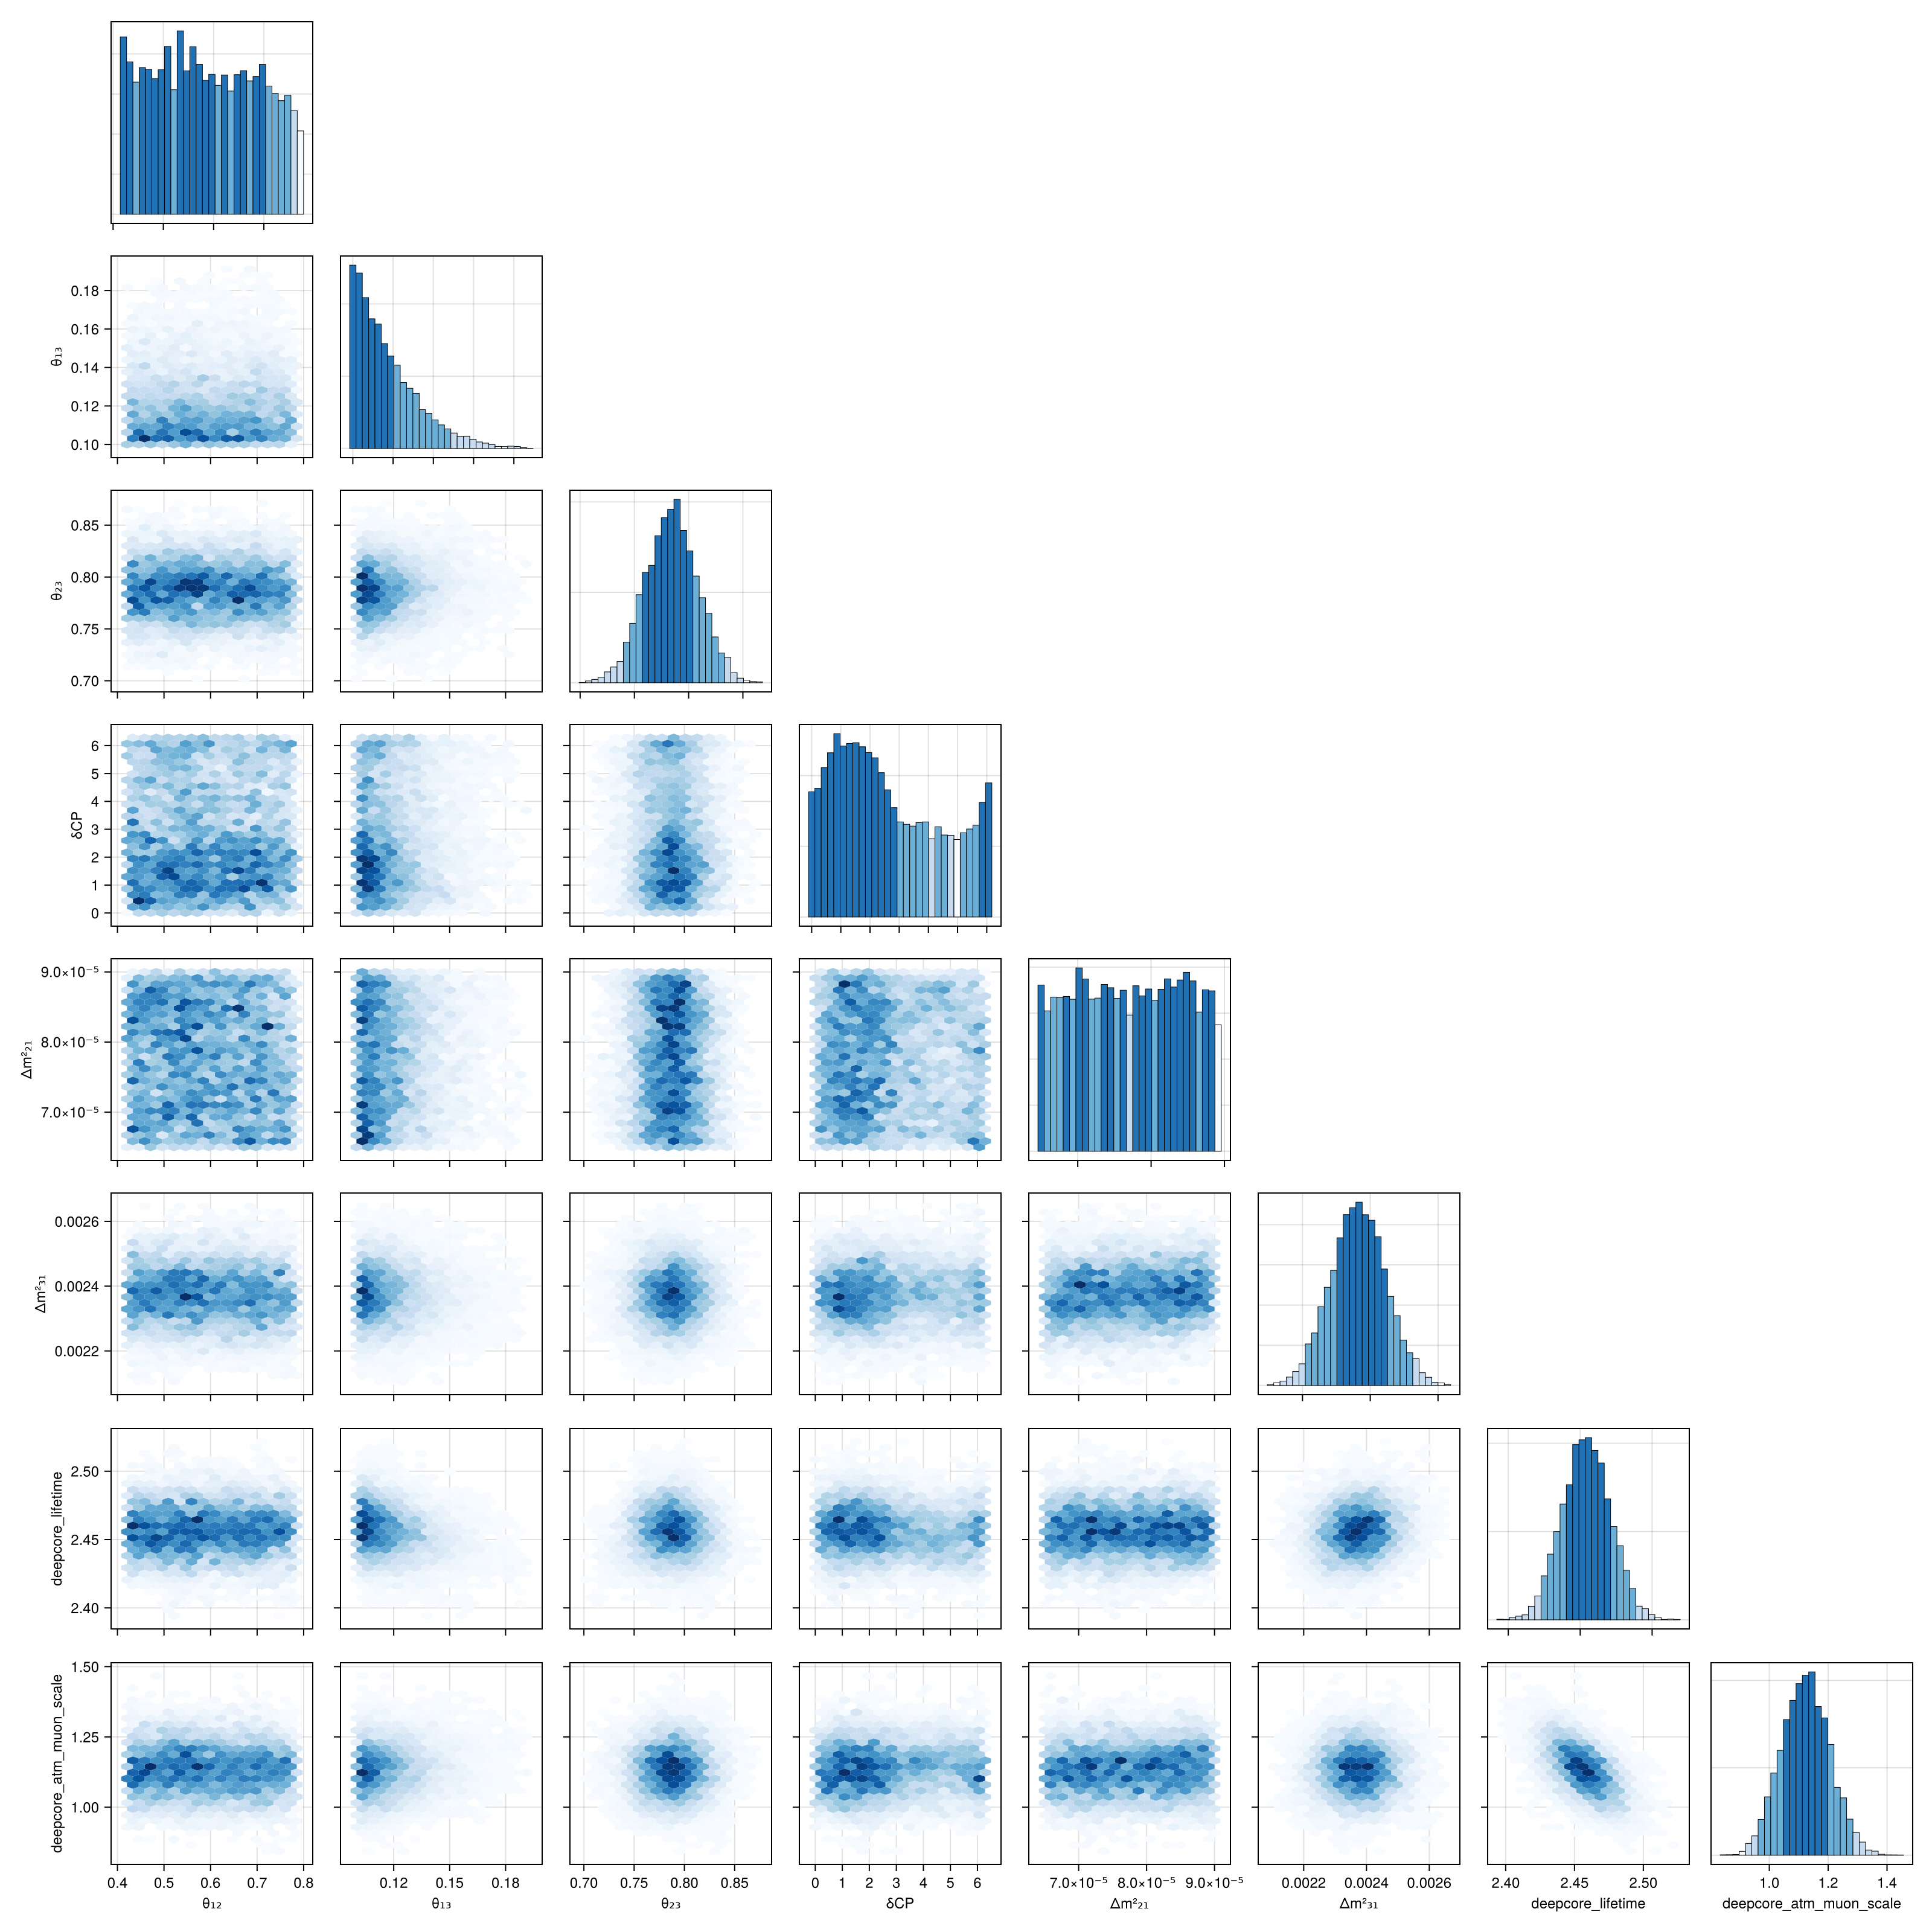

In [136]:
plot(samples)

In [161]:
#@time withgradient(p -> logdensityof(l, p) , p)

LoadError: InterruptException:

In [141]:
using Printf

In [227]:
e_ticks = (reco_energy_bin_edges, [@sprintf("%.1f",b) for b in reco_energy_bin_edges])

([5.623413, 7.498942, 10.0, 13.335215, 17.782795, 23.713737, 31.622776, 42.16965, 56.23413], ["5.6", "7.5", "10.0", "13.3", "17.8", "23.7", "31.6", "42.2", "56.2"])

In [228]:
function plotmap(h; colormap=Reverse(:Spectral), symm=false)

    if symm
        colorrange = (-maximum(abs.(h)), maximum(abs.(h)))
    else
        colorrange = (0, maximum(h))
    end
    
    fig = Figure(size=(800, 400))
    ax = Axis(fig[1,1], xscale=log10, xticks=e_ticks, xlabel="E (GeV)", ylabel="cos(zen)", title="cascades")
    hm = heatmap!(ax, reco_energy_bin_edges, reco_coszen_bin_edges, h[:, :, 1], colormap=colormap, colorrange=colorrange)
    ax = Axis(fig[1,2], xscale=log10, xticks=e_ticks, xlabel="E (GeV)", yticksvisible=true, yticklabelsvisible=false, title="tracks")
    hm = heatmap!(ax, reco_energy_bin_edges, reco_coszen_bin_edges, h[:, :, 2], colormap=colormap, colorrange=colorrange)
    Colorbar(fig[1,3], hm)
    fig
end

plotmap (generic function with 1 method)

In [229]:
expected = get_expected(p, osc_prob);

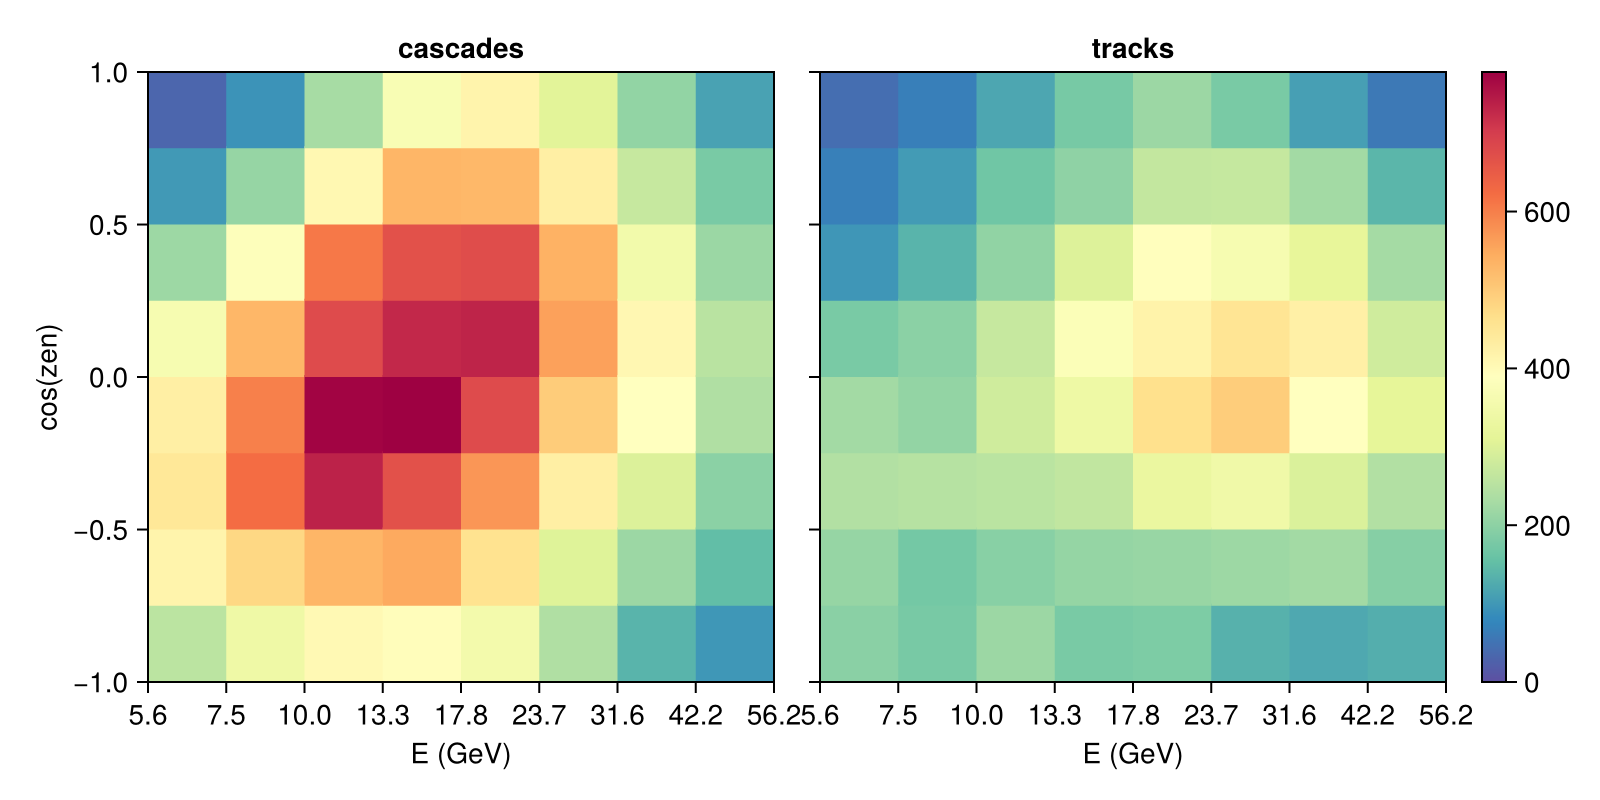

In [230]:
plotmap(data_histo)

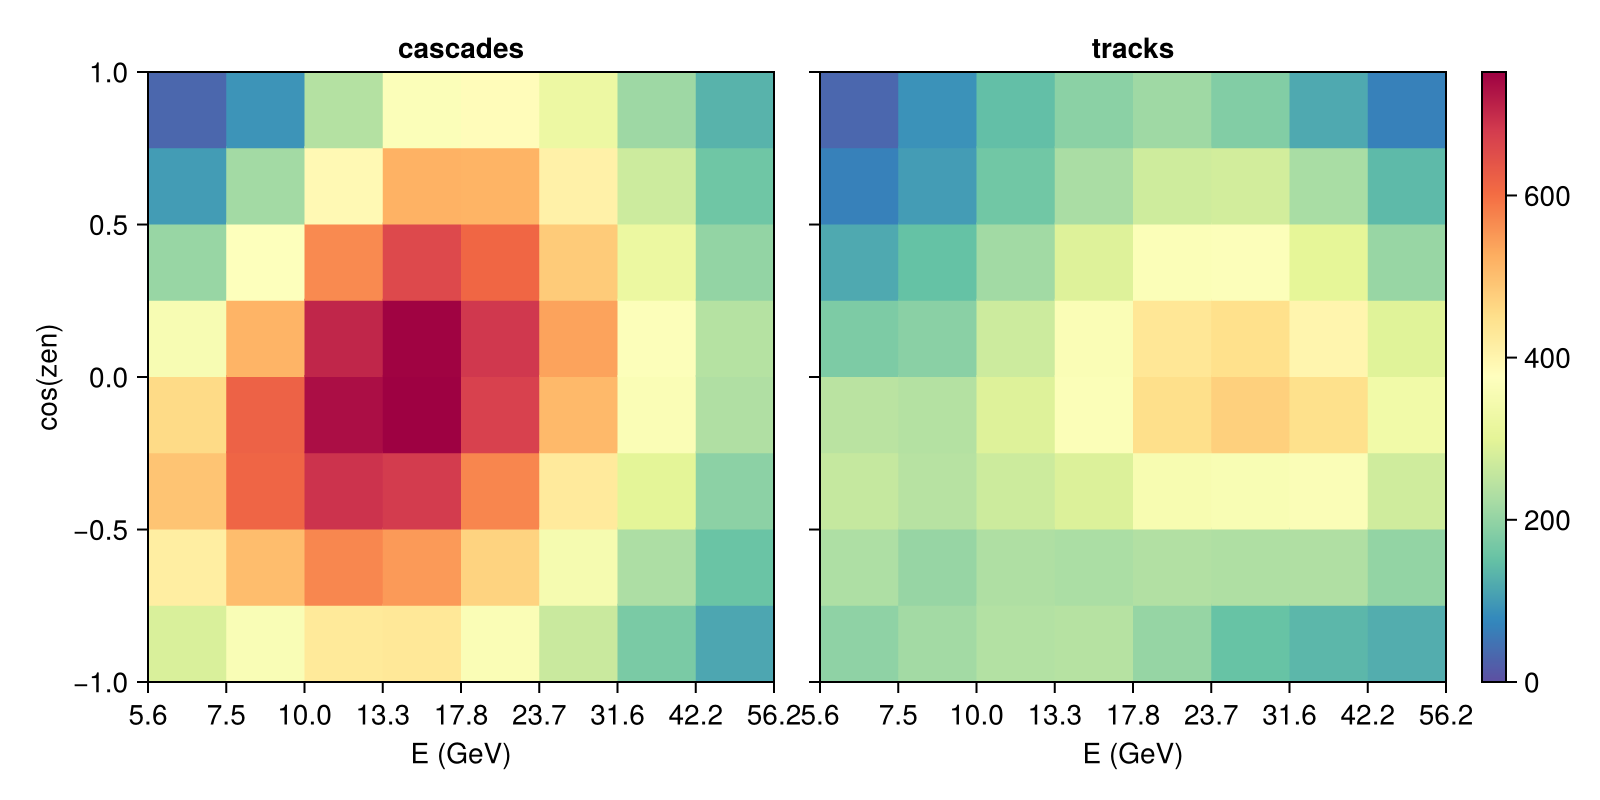

In [231]:
plotmap(expected)

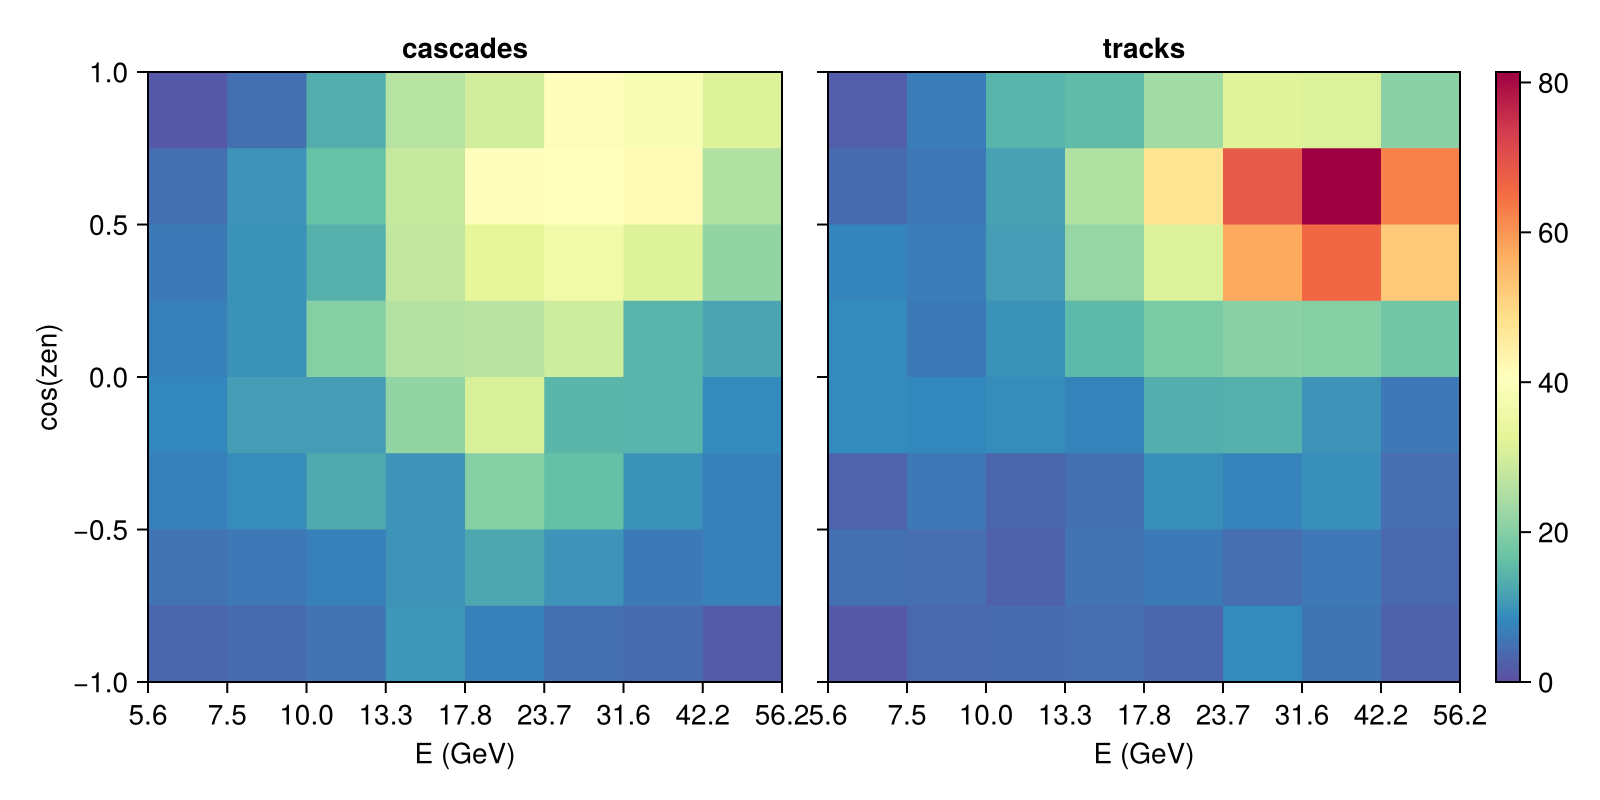

In [232]:
plotmap(muon_histo)

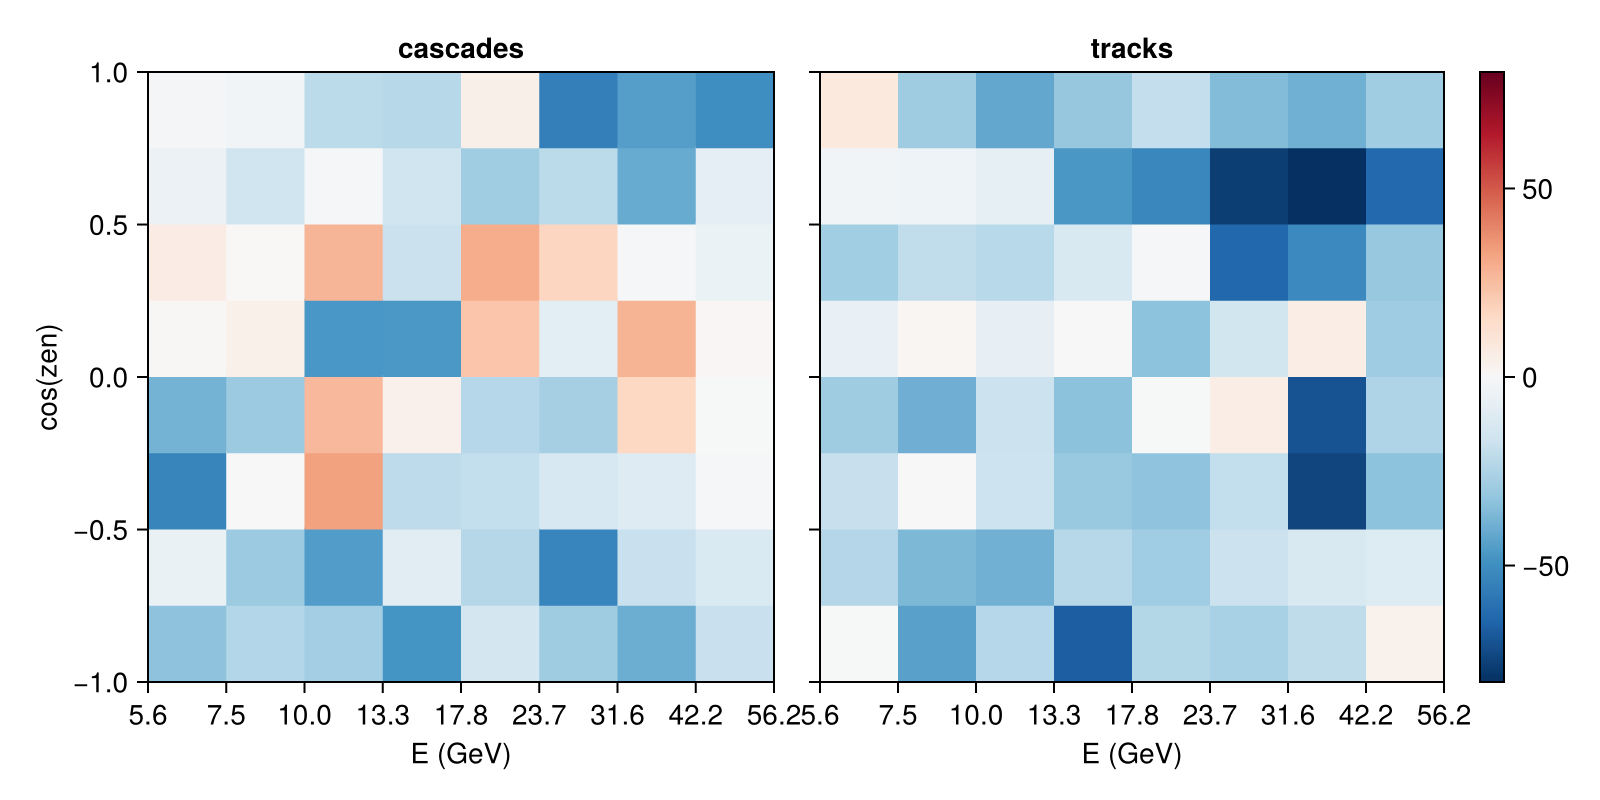

In [233]:
fig = plotmap((data_histo .- (expected .+ muon_histo)), colormap=Reverse(:RdBu), symm=true)

In [234]:
para_d = merge(params_dict, Newtrinos.osc.standard.params)

OrderedDict{Any, Any} with 8 entries:
  :deepcore_lifetime       => 2.5
  :deepcore_atm_muon_scale => 1.0
  :θ₁₂                     => 0.587252
  :θ₁₃                     => 0.145426
  :θ₂₃                     => 0.855629
  :δCP                     => 1.0
  :Δm²₂₁                   => 7.53e-5
  :Δm²₃₁                   => 0.0024753

In [235]:
prio_d = copy(para_d)

OrderedDict{Any, Any} with 8 entries:
  :deepcore_lifetime       => 2.5
  :deepcore_atm_muon_scale => 1.0
  :θ₁₂                     => 0.587252
  :θ₁₃                     => 0.145426
  :θ₂₃                     => 0.855629
  :δCP                     => 1.0
  :Δm²₂₁                   => 7.53e-5
  :Δm²₃₁                   => 0.0024753

In [236]:
collect(keys(prio_d))

8-element Vector{Any}:
 :deepcore_lifetime
 :deepcore_atm_muon_scale
 :θ₁₂
 :θ₁₃
 :θ₂₃
 :δCP
 :Δm²₂₁
 :Δm²₃₁

In [237]:
prio_d[:θ₂₃] = Newtrinos.osc.standard.priors[:θ₂₃]
prio_d[:Δm²₃₁] = Newtrinos.osc.standard.priors[:Δm²₃₁]

Uniform{Float64}(a=0.002, b=0.003)

In [241]:
vars_to_scan = (θ₂₃ = 100, Δm²₃₁=100)

(θ₂₃ = 100, Δm²₃₁ = 100)

In [242]:
@time res = Newtrinos.profile(l, prio_d, vars_to_scan, para_d)

 49.238993 seconds (3.60 M allocations: 366.068 GiB, 46.77% gc time)


NewtrinosResult((θ₂₃ = [0.5235987755982988, 0.5288876521194937, 0.5341765286406887, 0.5394654051618837, 0.5447542816830786, 0.5500431582042735, 0.5553320347254684, 0.5606209112466634, 0.5659097877678583, 0.5711986642890533  …  0.9995976625058431, 1.004886539027038, 1.010175415548233, 1.015464292069428, 1.0207531685906228, 1.0260420451118177, 1.0313309216330129, 1.0366197981542078, 1.0419086746754027, 1.0471975511965976], Δm²₃₁ = [0.002, 0.00201010101010101, 0.00202020202020202, 0.0020303030303030303, 0.0020404040404040404, 0.0020505050505050504, 0.0020606060606060605, 0.0020707070707070706, 0.0020808080808080807, 0.0020909090909090908  …  0.002909090909090909, 0.0029191919191919194, 0.002929292929292929, 0.0029393939393939396, 0.0029494949494949497, 0.0029595959595959597, 0.00296969696969697, 0.00297979797979798, 0.00298989898989899, 0.003]), (θ₁₂ = [0.5872523687443223 0.5872523687443223 … 0.5872523687443223 0.5872523687443223; 0.5872523687443223 0.5872523687443223 … 0.5872523687443223

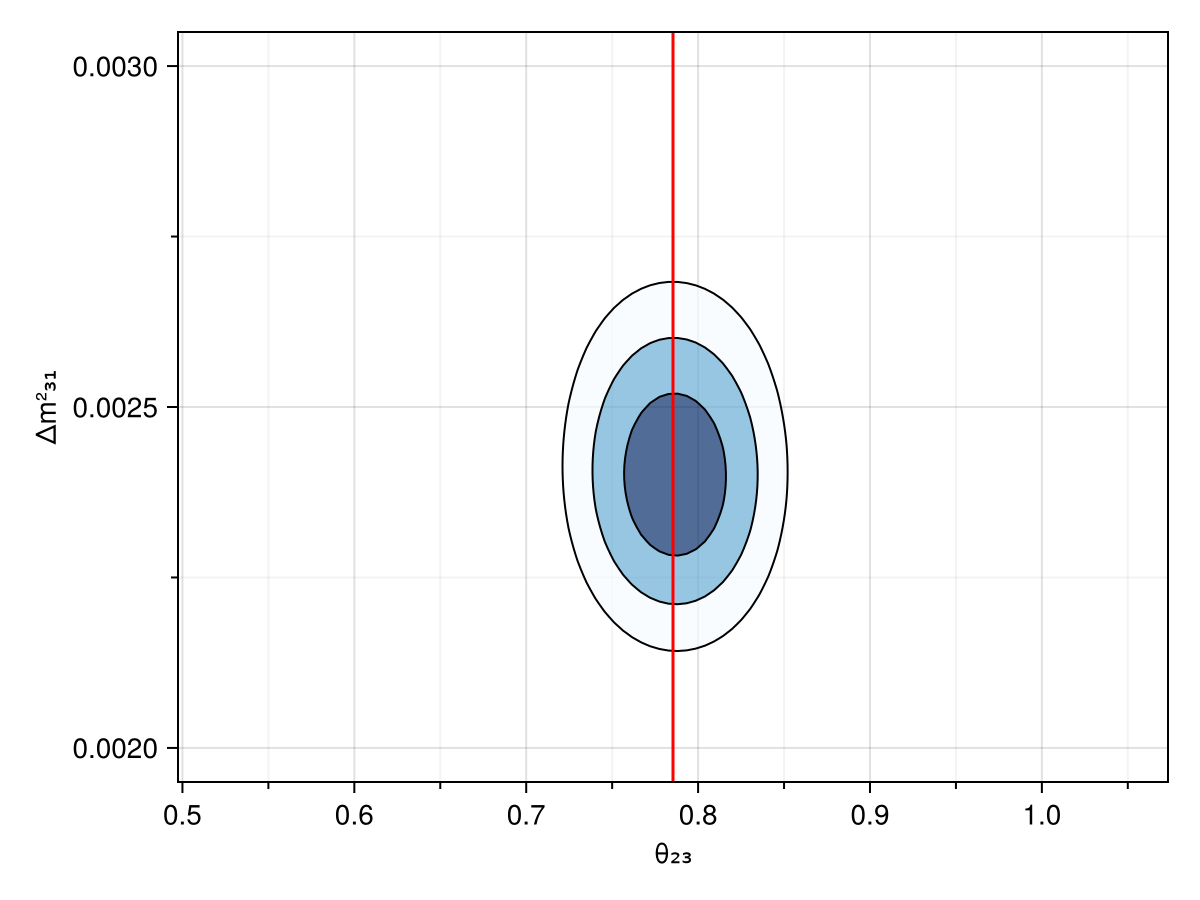

In [243]:
plot(res)
vlines!(pi/4, color=:red)
current_figure()

In [166]:
Newtrinos.bestfit(res)

(θ₁₂ = 0.5872523687443223, Δm²₂₁ = 7.53e-5, deepcore_lifetime = 2.5, θ₁₃ = 0.1454258194533693, deepcore_atm_muon_scale = 1.0, δCP = 1.0, llh = -580.3721001099093, log_posterior = -580.3721001099093, θ₂₃ = 0.7944257284939706, Δm²₃₁ = 0.002413793103448276)

In [167]:
pi/4

0.7853981633974483